### GEOL 497-O 
Liam Horner,
10/28/20

# Homework: Hillslope diffusion


## 1. A steady state, uplifting landscape

### a)
Start with a flat 1D profile and model the effect of topographic uplift + diffusion. Start with a 100 m long profile. Pin the edges at z = 0. Use K = 0.1 and an uplift rate of 0.1 mm/yr. Run your model to steady state. Output a figure showing the progression of topographic profiles. Show 5-10 profiles through time. 

*Hint: 'uplift' your landscape in each time step!*


*Grad students and folks who have coded before: make the colors of the lines progress through time (e.g. start light grey, move towards black).*

*Optional challenge for those interested: Linearize the calculations to get rid of the for loop through space -- you'll still need the for loop through time.*


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
#%matplotlib inline 

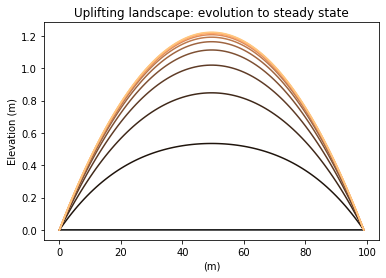

In [2]:
z = np.zeros(100) # initial flat topo profile
x = np.arange(0, np.size(z))

K = 0.1 # diffusuion coefficient 
dt = 1 # timestep (years)
dx = 1 # distance between each point (meters)
uplift_rate = 0.0001 # (meters)
Max_elev = [np.max(z)] # finds maximum elevation in the topo profile

time = np.arange(0,60001) # number of timesteps in model (years)

n_lines = (11)
color_idx = iter(np.linspace(0, 1, n_lines)) # iteration for colormap

for t in (time):
    
    time 
    z_new = np.zeros_like(z)
    z_new[0] = 0
    z_new[-1] = 0
        # locks profile edges at their initial elevation (boundary conditions)
    
    for i in range(1,len(z)-1):
        z_new[i] = (z[i] + K * dt * (z[i+1] - 2 * z[i] + z[i-1]) / dx**2) + uplift_rate 
            # diffusion and uplift equation
            
    z = z_new.copy()
    
    Max = np.max(z) # finds new maximum elevation in each subsequent time step
    Max_elev.append(Max) 
    
    if t%6000 == 0:
        
        c = next(color_idx)
        plt.plot(x, z, color = plt.cm.copper(c))
        plt.title('Uplifting landscape: evolution to steady state')
        plt.ylabel('Elevation (m)')
        plt.xlabel('(m)')
            # plots topo profile every 6000 years of model run 
        
plt.show()

### b) Tracking the evolution to steady state

Add to the code above to create an array of time and a array of maximum elevation at each time. Make a figure to show how the maximum of your evolving hillslope changes through time. Label the axes, including units. 

Text(0.5, 0, 'Time (yrs)')

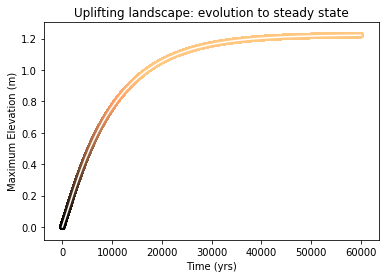

In [3]:
time_plot = np.append(time, 60001)
plt.plot(time_plot,Max_elev, color='w')
plt.scatter(time_plot,Max_elev, c=cm.copper(np.abs(Max_elev)), edgecolor='none')
plt.title('Uplifting landscape: evolution to steady state')
plt.ylabel('Maximum Elevation (m)')
plt.xlabel('Time (yrs)')

## 2. Diffusion of a landscape in 2D

### a)
Use the 2-D finite difference approach to modeling hillslope diffusion to evolve the upper left hand quadrant of the DEM we've been working with. 

Hint: This will require a second for loop through space

``` for t in ...:
    for i in ... : #loop through the rows
        for j in ... : #loop through the columns
            z_new [i,j]= 
```

In [4]:
topo = np.loadtxt('data/topo.asc',delimiter=',') # read in topo data
NW_quad = topo[:250,:250] # select portion of map we want to work with 

K = 0.1 # diffusion coefficient
dt = 1 # timestep (years)
dx = 1 # grid spacing (meters)
dy = 1 # vertical grid spacing (meters)

time_2D = np.arange(0,1000) # number of timesteps in 2D model (years)

for t in (time_2D):
    
    time_2D 
    NW_quad_new = np.zeros_like(NW_quad)
    NW_quad_new[0,:] = NW_quad[0,:]
    NW_quad_new[-1,:] = NW_quad[-1,:]
    NW_quad_new[:,0] = NW_quad[:,0]
    NW_quad_new[:,-1] = NW_quad[:,-1]
        # locks map edges at their initial elevation (boundary conditions)
    
    for i in range(1,len(NW_quad)-1):
        for j in range(1,len(NW_quad[i])-1):
            
            NW_quad_new[i,j] = NW_quad[i,j] + K * dt * ((NW_quad[i+1,j] - 2 * NW_quad[i,j] + NW_quad[i-1,j]) / dx**2 + 
                                            (NW_quad[i,j+1] - 2 * NW_quad[i,j] + NW_quad[i,j+1]) / dy**2)
                # 2D diffusion equation
            
    NW_quad = NW_quad_new.copy()

### b) Plotting
Output a colored DEM showing the new topography after a long period of diffusion. 

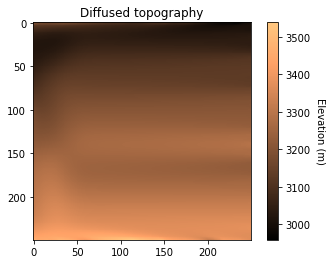

In [5]:
plt.imshow(NW_quad_new, cmap = 'copper') 
plt.title('Diffused topography')
cbar = plt.colorbar()
cbar.set_label('Elevation (m)', rotation=270, labelpad = 15)

Output a figure showing the change in topography from the original DEM to this new, diffused DEM. Hint: 'imshow' the difference between the two arrays. 

<Figure size 432x288 with 0 Axes>

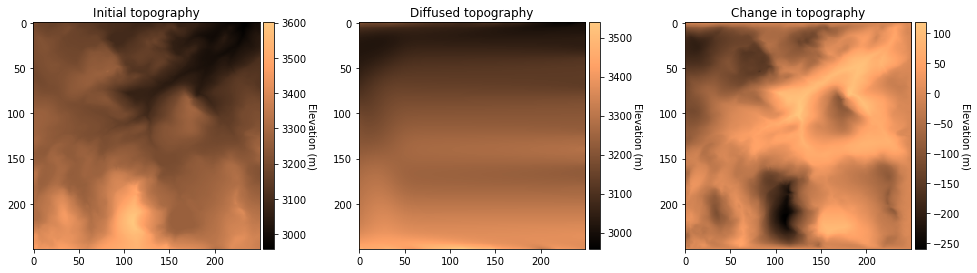

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

NW_quad_initial = topo[:250,:250]

plt.figure()

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16,15))

im1 = ax1.imshow(NW_quad_initial, cmap = 'copper') 
ax1.set_title('Initial topography')
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes("right", size="5%", pad=0.05)
cbar1 = fig.colorbar(im1, cax=cax1)
cbar1.set_label('Elevation (m)', rotation=270, labelpad = 10)

im2 = ax2.imshow(NW_quad_new, cmap = 'copper') 
ax2.set_title('Diffused topography')
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes("right", size="5%", pad=0.05)
cbar2 = fig.colorbar(im2, cax=cax2)
cbar2.set_label('Elevation (m)', rotation=270, labelpad = 10)

im3 = ax3.imshow(NW_quad_new - NW_quad_initial, cmap = 'copper') 
ax3.set_title('Change in topography')
divider = make_axes_locatable(ax3)
cax3 = divider.append_axes("right", size="5%", pad=0.05)
cbar3 = fig.colorbar(im3, cax=cax3)
cbar3.set_label('Elevation (m)', rotation=270, labelpad = 10)

plt.subplots_adjust(wspace = .35)